In [133]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
import cv2
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns

from shiftlab_ocr.doc2text.reader import Reader

- должность
- норм дату сделать

In [134]:
# from PIL import Image
# from surya.ocr import run_ocr
# from surya.model.detection import segformer
# from surya.model.recognition.model import load_model
# from surya.model.recognition.processor import load_processor

# image = Image.open(r"train_RZHD_TrudovieKnizhki\27\27_4.jpg")
# langs = ["ru"] # Replace with your languages
# det_processor, det_model = segformer.load_processor(), segformer.load_model()
# rec_model, rec_processor = load_model(), load_processor()

# predictions = run_ocr([image], [langs], det_model, det_processor, rec_model, rec_processor)

In [135]:
# predictions

NameError: name 'predictions' is not defined

In [136]:
h, w, _ = cv2.imread(r"train_RZHD_TrudovieKnizhki\27\27_4.jpg").shape

In [150]:
h, w

(1652, 2232)

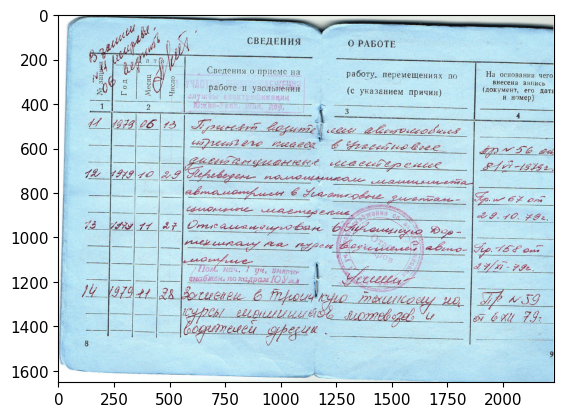

In [138]:
plt.imshow(cv2.imread(r"train_RZHD_TrudovieKnizhki\27\27_4.jpg")[:, :]);

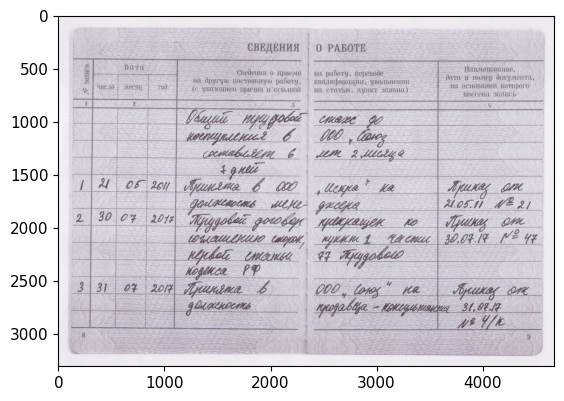

In [139]:
plt.imshow(cv2.imread(r"train_RZHD_TrudovieKnizhki\39\39.2.JPG")[:, :]);

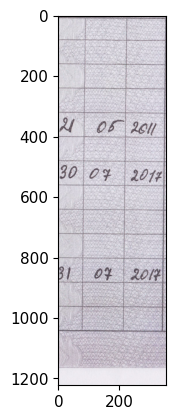

In [181]:
plt.imshow(cv2.resize(cv2.imread(r"train_RZHD_TrudovieKnizhki\39\39.2.JPG"), (w, h))[int(h * 0.26):, int(w * 0.08):int(w * 0.24)]);

In [182]:
reader = Reader()
# img = cv2.imread(r"train_RZHD_TrudovieKnizhki\27\27_4.jpg")[int(h * 0.26):, :int(w * 0.24)]
img = cv2.resize(cv2.imread(r"train_RZHD_TrudovieKnizhki\39\39.2.JPG"), (2232, 1652))[int(h * 0.26):, int(w * 0.08):int(w * 0.24)]
cv2.imwrite('test.jpg', img)

recognizer weights has loaded from c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\shiftlab_ocr\doc2text\ocr_transformer_4h2l_simple_conv_64x256.pt
requirements: C:\Users\Egor\AppData\Local\Programs\Python\Python310\Lib\site-packages\shiftlab_ocr\doc2text\yolov5\requirements.txt not found, check failed.


True

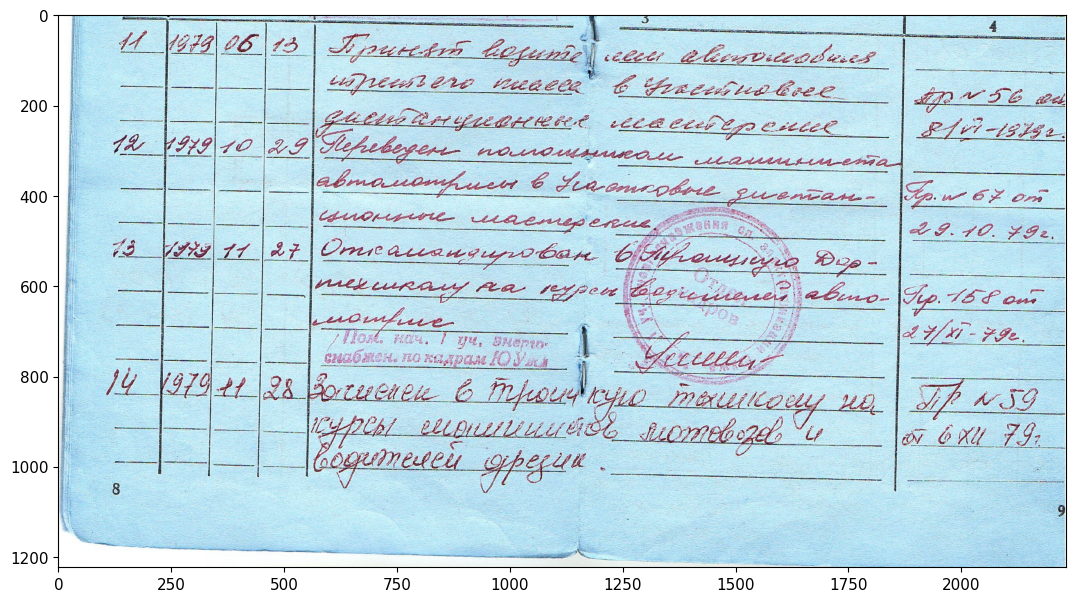

In [183]:
plt.subplots(figsize=[13, 15])
plt.imshow(cv2.imread(r"train_RZHD_TrudovieKnizhki\27\27_4.jpg")[int(h * 0.26):, :])

In [184]:
int(h * 0.26), int(w * 0.1) / w, int(w * 0.24)

(429, 0.09991039426523297, 535)

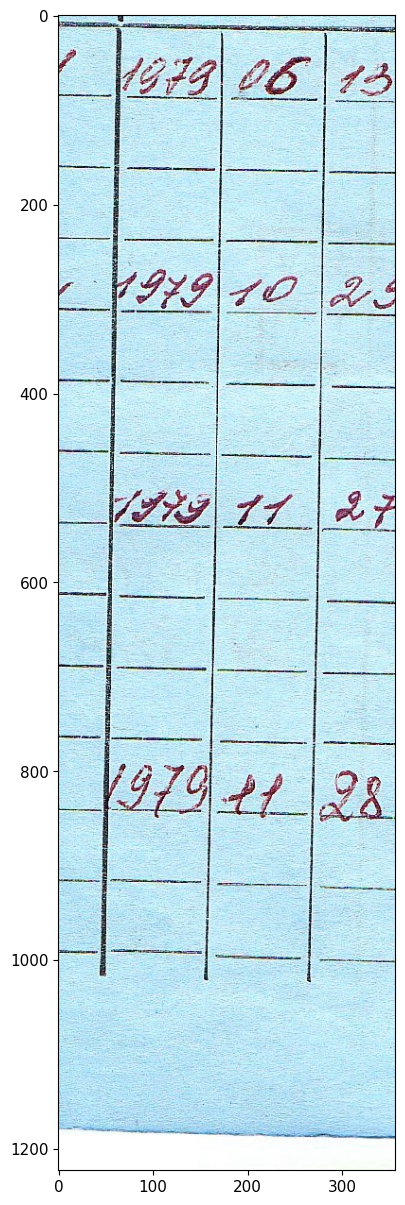

In [186]:
plt.subplots(figsize=[13, 15])
plt.imshow(cv2.imread(r"train_RZHD_TrudovieKnizhki\27\27_4.jpg")[int(h * 0.26):, int(w * 0.08):int(w * 0.24)])

In [187]:
result = reader.doc2text("test.jpg")

In [287]:
def calculate_y_distances(boxes: list, y_max: float, flag: bool = False) -> list:
    # Создаем список для хранения расстояний
    distances = []
    
    # Проходим по списку box-ов, рассчитывая расстояния между последовательными парами
    for i in range(len(boxes) - 1):
        # Первый box
        box1_top_y = boxes[i][0][1]
        box1_bottom_y = boxes[i][1][1]

        # Второй box
        box2_top_y = boxes[i + 1][0][1]
        box2_bottom_y = boxes[i + 1][1][1]

        # Расчет расстояния между нижней границей первого box и верхней второго
        if box1_bottom_y < box2_top_y:
            distance = box2_top_y - box1_bottom_y
        elif box2_bottom_y < box1_top_y:
            distance = box1_top_y - box2_bottom_y
        else:
            # Box-ы перекрываются по y
            distance = 0
        if distance > 0:
            # Добавляем расстояние в список
            distances.append((box1_top_y, box2_top_y))
        if flag and distance == 0:
            distances.append((0, 0))
    distances.append((boxes[-1][0][1], y_max))
    return distances

In [189]:
# train_RZHD_TrudovieKnizhki\39\39.2.JPG

In [226]:
result[0]

'21 06 201 08 2011 30 30/07 2017 07.2017 31 07 2017 Пусть 1) Функция '

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

images = result[1]
N = 48  # how many crops to show
n = int(N ** (0.5))
k = 0
dt = result[0].split()
dt_box = []
for i in range(len(images)):
    # print(dt[k], dt[k].isdigit(), dt[k].replace('.', '').replace(')', '').isdigit())
    if dt[k].replace('.', '').replace(')', '').isdigit():
        dt_box.append(images[k].points)
        print(images[k].points)
        print(dt[k], dt[k].isdigit(), dt[k].replace('.', '').replace(')', '').isdigit())
    k += 1
print(dt_box)

[[0.3106255829334259, 326.3436584472656], [67.87380981445312, 391.7197265625]]
21 True True
[[119.92730712890625, 342.4420166015625], [215.57351684570312, 388.0317077636719]]
06 True True
[[236.1829376220703, 341.9140319824219], [335.3134765625, 401.4190673828125]]
201 True True
[[123.70514678955078, 336.6625061035156], [339.6158752441406, 398.2385559082031]]
08 True True
[[0.0, 490.07476806640625], [90.45220947265625, 541.9991455078125]]
2011 True True
[[0.0, 492.1592102050781], [186.20834350585938, 544.6937866210938]]
30 True True
[[237.8904571533203, 497.7131652832031], [344.3066711425781, 559.378662109375]]
30/07 False False
[[99.42086791992188, 500.84112548828125], [352.4383850097656, 551.9613647460938]]
2017 True True
[[0.0, 824.5037231445312], [53.791080474853516, 872.7344970703125]]
07.2017 False True
[[113.53536987304688, 831.206298828125], [195.99261474609375, 871.7083740234375]]
31 True True
[[232.1983184814453, 832.3541259765625], [349.0862121582031, 880.073486328125]]
07 T

IndexError: list index out of range

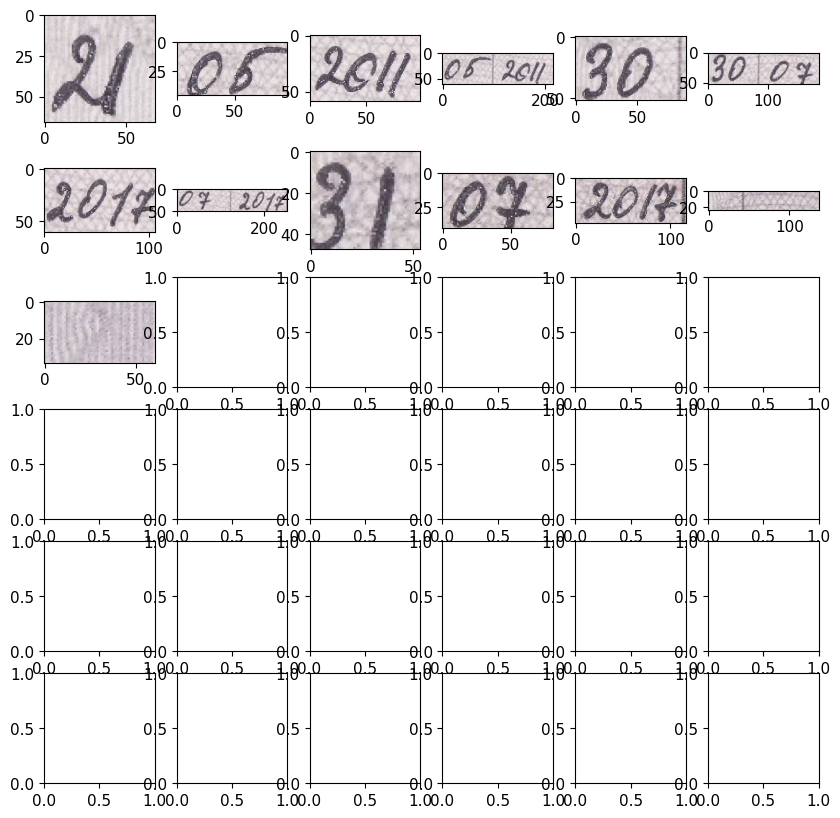

In [227]:
import matplotlib.pyplot as plt
%matplotlib inline

images = result[1]
N = 48  # how many crops to show
n = int(N ** (0.5))
k = 0
dt = result[0].split()
dt_box = []
f, axarr = plt.subplots(n,n,figsize=(10,10))
for i in range(n):
    for j in range(n):
        # print(dt[k], dt[k].isdigit(), dt[k].replace('.', '').replace(')', '').isdigit())
        # if dt[k].replace('.', '').replace(')', '').isdigit():
        axarr[i, j].imshow(images[k].img)
        dt_box.append(images[k].points)
        print(images[k].points)
        print(dt[k], dt[k].isdigit(), dt[k].replace('.', '').replace(')', '').isdigit())
        k += 1
f.show()
print(dt_box)

[[0.3106255829334259, 326.3436584472656], [67.87380981445312, 391.7197265625]]
21 True True
[[119.92730712890625, 342.4420166015625], [215.57351684570312, 388.0317077636719]]
06 True True
[[236.1829376220703, 341.9140319824219], [335.3134765625, 401.4190673828125]]
201 True True
[[123.70514678955078, 336.6625061035156], [339.6158752441406, 398.2385559082031]]
08 True True
[[0.0, 490.07476806640625], [90.45220947265625, 541.9991455078125]]
2011 True True
[[0.0, 492.1592102050781], [186.20834350585938, 544.6937866210938]]
30 True True
[[99.42086791992188, 500.84112548828125], [352.4383850097656, 551.9613647460938]]
2017 True True
[[0.0, 824.5037231445312], [53.791080474853516, 872.7344970703125]]
07.2017 False True
[[113.53536987304688, 831.206298828125], [195.99261474609375, 871.7083740234375]]
31 True True
[[232.1983184814453, 832.3541259765625], [349.0862121582031, 880.073486328125]]
07 True True
[[37.20234680175781, 973.765380859375], [174.19146728515625, 997.8641967773438]]
2017 Tru

IndexError: list index out of range

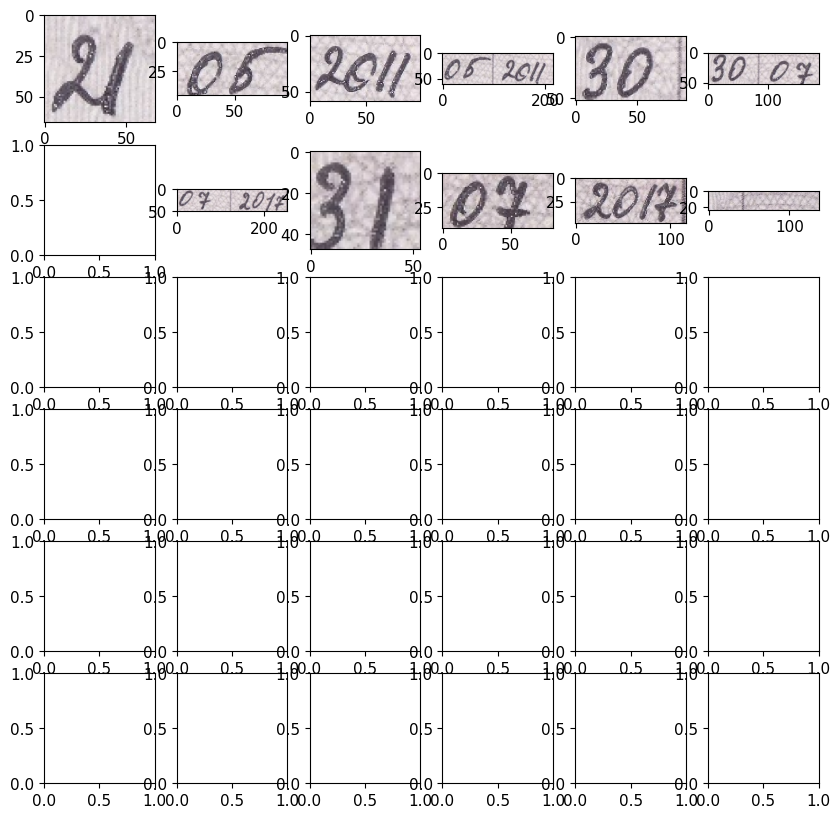

In [191]:
import matplotlib.pyplot as plt
%matplotlib inline

images = result[1]
N = 48  # how many crops to show
n = int(N ** (0.5))
k = 0
dt = result[0].split()
dt_box = []
f, axarr = plt.subplots(n,n,figsize=(10,10))
for i in range(n):
    for j in range(n):
        # print(dt[k], dt[k].isdigit(), dt[k].replace('.', '').replace(')', '').isdigit())
        if dt[k].replace('.', '').replace(')', '').isdigit():
            axarr[i, j].imshow(images[k].img)
            dt_box.append(images[k].points)
            print(images[k].points)
            print(dt[k], dt[k].isdigit(), dt[k].replace('.', '').replace(')', '').isdigit())
        k += 1
f.show()
print(dt_box)

In [192]:
for i in calculate_y_distances(dt_box, img.shape[0]):
    print(i)

(336.6625061035156, 490.07476806640625)
(500.84112548828125, 824.5037231445312)
(832.3541259765625, 973.765380859375)
(973.765380859375, 1223)


In [ ]:
def filter_boxes_by_distance(boxes: list, max_distance: int) -> list:
    # Фильтруем box-ы, где расстояние меньше заданного
    filtered_boxes = []
    for i in range(len(boxes)):
        if boxes[i][0][1] <= max_distance:
            filtered_boxes.append(boxes[i])

    return filtered_boxes

In [307]:
def remove_duplicates(input_list: list) -> list:
    seen = set()
    result = []
    for item in input_list:
        if item not in seen:
            seen.add(item)
            result.append(item)
    return result

In [322]:
from spellchecker import SpellChecker

russian = SpellChecker(language='ru')

In [332]:
russian.correction('27.19')

'27.19'

In [338]:
for i in ['3', 'Принят', 'водите', 'свои', 'свитомобиль', 'вып', 'изрешьего', 'таева', 'в', '27.19', '12', 'астнов', '017', '2018', '97281', '277']:
    print(russian.correction(i), i)

3 3
Принят Принят
видите водите
свои свои
автомобиль свитомобиль
вы вып
None изрешьего
такова таева
я в
27.19 27.19
12 12
остров астнов
017 017
2018 2018
97281 97281
277 277


In [339]:
def get_data(img_path: str, ocr_model: Reader) -> dict:
    img = cv2.resize(cv2.imread(img_path), (2232, 1652))
    cv2.imwrite('elem.jpg', img[int(h * 0.26):, int(w * 0.086):int(w * 0.24)])
    result = ocr_model.doc2text("elem.jpg")
    data = {
        'data': [],
        'work': [],
        'job_title': [],
        'description': []
    }
    images = result[1]
    print(result[0])
    dt = result[0].split()
    dt_box, text_dt = [], {}
    k = 0
    for i in range(len(images) - 1):
        if dt[i].replace('.', '').replace(')', '').isdigit():
            dt_box.append(images[i].points)
            if calculate_y_distances([images[i].points, images[i + 1].points], img[int(h * 0.26):, :].shape[0], flag=True)[0][0] == 0:
                if k not in text_dt:
                    text_dt[k] = [dt[i], dt[i + 1]]
                else:
                    text_dt[k].append(dt[i])
                    text_dt[k].append(dt[i + 1])
            else:
                k += 1
    print(text_dt)
    text_dt = [' '.join(remove_duplicates(text_dt[i])) for i in text_dt]
    print(text_dt)
    print(calculate_y_distances(dt_box, img[int(h * 0.26):, :].shape[0]))

    for i, elem in enumerate(calculate_y_distances(dt_box, img[int(h * 0.26):, :].shape[0])):
        img_tmp = img[int(h * 0.26):, :]
        img_tmp = img_tmp[int(round(elem[0])):int(round(elem[1])), :]
        print(int(round(elem[0])), int(round(elem[1])), '-----')
        col_1, col_2 = (img_tmp[:, int(w * 0.22):int(w * 0.8)],
                       img_tmp[:, int(w * 0.8):])
        cv2.imwrite(f'col_{i}.jpg', col_1)
        cv2.imwrite('col__2.jpg', col_2)
        result_1, result_2 = (ocr_model.doc2text(f'col_{i}.jpg'),
                              ocr_model.doc2text("col__2.jpg"))
        data['data'].append(text_dt[i] if len(text_dt) > i else "notFound")
        data['job_title'].append(
            result_1[0].lower().split('на должность')[-1].strip() if 'на должность' in ' '.join([russian.correction(i) if russian.correction(i) else i for i in result_1[0].split()]).lower() 
            else "notFound")
        data['work'].append(' '.join([russian.correction(i) if russian.correction(i) else i for i in result_1[0].split()]))
        data['description'].append(' '.join([russian.correction(i) if russian.correction(i) else i for i in result_2[0].split()]))
    return data

In [341]:
get_data(r'train_RZHD_TrudovieKnizhki\39\39.2.JPG', reader)

2 06 2011 08.2011 30 3017 07 2017 07 07.2017 2017 1) Функция 
{0: ['2', '06', '06', '2011', '2011', '08.2011'], 1: ['30', '3017', '3017', '07', '07', '2017'], 2: ['07', '07.2017', '07.2017', '2017']}
['2 06 2011 08.2011', '30 3017 07 2017', '07 07.2017 2017']
[(339.2181091308594, 493.5969543457031), (497.25445556640625, 831.3473510742188), (830.7022094726562, 1223)]
339 494 -----
497 831 -----
831 1223 -----


{'data': ['2 06 2011 08.2011', '30 3017 07 2017', '07 07.2017 2017'],
 'work': ['вринятся 000 искра на ли должность менее имена 28',
  '17 рядовой договор прекрасен А по 16 соглашение столом пункт части 30 первой старый я Прудового кодекс ра',
  'придется союз на должность продавцы сэр консультант'],
 'job_title': ['notFound', 'notFound', 'продавца стр консультанта'],
 'description': ['нет для пара или про для мои от по от',
  'по или обо что до до род общий',
  'от пола до долг 1985 полна 17.04.13']}

In [259]:
'ertyui ad ghjkl'.split('на должность')

['ertyui ad ghjkl']

In [225]:
get_data(r'train_RZHD_TrudovieKnizhki\39\39.2.JPG', reader)

общий водить 201 06 201 07 2017 07.2017 2017 Пусть 
[[188.96566772460938, 346.95562744140625], [299.6628723144531, 397.1866149902344]]
[[85.4765853881836, 339.5971984863281], [311.3025207519531, 397.8809509277344]]
[[7.481548309326172, 495.04107666015625], [157.02439880371094, 548.5855712890625]]
[[196.22219848632812, 499.0469970703125], [299.4339599609375, 558.4064331054688]]
[[72.41385650634766, 823.5297241210938], [312.0, 877.868408203125]]
[[186.473388671875, 834.0271606445312], [312.0, 877.3548583984375]]
[[7.0444464683532715, 1139.9697265625], [135.7635955810547, 1166.368408203125]]
[[[188.96566772460938, 346.95562744140625], [299.6628723144531, 397.1866149902344]], [[85.4765853881836, 339.5971984863281], [311.3025207519531, 397.8809509277344]], [[7.481548309326172, 495.04107666015625], [157.02439880371094, 548.5855712890625]], [[196.22219848632812, 499.0469970703125], [299.4339599609375, 558.4064331054688]], [[72.41385650634766, 823.5297241210938], [312.0, 877.868408203125]], [[

In [245]:
def get_data_columns(img: np.ndarray, string_cords: list, ocr_modul: Reader) -> dict:
    data = {
        'number_data': [],
        'grants_or_work': [],
        'description': []
    }

    for elem in string_cords:
        img_tmp = img[int(round(elem[0])):int(round(elem[1])), :]
        col_1, col_2, col_3 = (img_tmp[:, int(w * 0.1):int(w * 0.24)],
                       img_tmp[:, int(w * 0.22):int(w * 0.8)],
                       img_tmp[:, int(w * 0.78):])
        cv2.imwrite('col_1.jpg', col_1)
        cv2.imwrite('col_2.jpg', col_2)
        cv2.imwrite('col_3.jpg', col_3)
        result_1, result_2, result_3 = (ocr_modul.doc2text("col_1.jpg"), 
                                        ocr_modul.doc2text("col_2.jpg"), 
                                        ocr_modul.doc2text("col_3.jpg"))
        data['number_data'].append(' '.join([i.replace('.', '').replace(')', '') 
                                    for i in result_1[0].split() if i.replace('.', '').replace(')', '').isdigit()]))
        data['grants_or_work'].append(result_2[0])
        data['description'].append(result_3[0])
    return data

In [246]:
img = cv2.imread(r"train_RZHD_TrudovieKnizhki\27\27_4.jpg")[int(h * 0.26):, int(w * 0.08):int(w * 0.24)]
cv2.imwrite('test.jpg', img)

True

In [247]:
result = reader.doc2text("test.jpg")

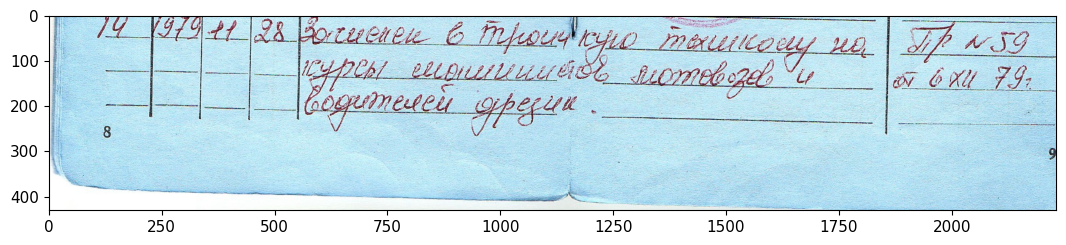

In [312]:
plt.subplots(figsize=[13, 15])
img = cv2.imread(r"train_RZHD_TrudovieKnizhki\27\27_4.jpg")[int(h * 0.26):, :]
plt.imshow(img[792:1223, :])

In [249]:
result[0]

'1) 1979 79/06 06 13 1 1979 10 10 2 б 1979 1979 11 11 27 9791 98 4 б '

In [250]:
images = result[1]
N = 48  # how many crops to show
n = int(N ** (0.5))
k = 0
dt = result[0].split()
dt_box = []
for i in range(len(result)):
    if dt[k].replace('.', '').replace(')', '').isdigit():
        dt_box.append(images[k].points)
    k += 1
print(dt_box)

[[[0.0, 25.544034957885742], [25.510059356689453, 68.43360137939453]], [[70.9592056274414, 38.03867721557617], [173.50498962402344, 91.3265151977539]]]


In [251]:
img.shape[0]

1223

In [252]:
calculate_y_distances(dt_box, img.shape[0])

[(38.03867721557617, 1223)]

In [253]:
get_data_columns(
    img=cv2.imread(r"train_RZHD_TrudovieKnizhki\27\27_4.jpg")[int(h * 0.26):, :],
    string_cords=calculate_y_distances(dt_box, img.shape[0]),
    ocr_modul=reader
)

{'number_data': ['1979 06 13 06 13 1979 10 10 2 7979 11 1975 1 27 9791'],
 'grants_or_work': ['3 ств. Принят возите свои авитомобиль из ченьего его пласса Ластновсе сле в участновне масштрен 9 Переведен помомником машини втомотримы в Участковые диетан ционные масту спене в 31517 234 7 Отле 2)Пулянскую ДОВ текшкому на нубсы водимелей авт лотвие 3 кв. 9.28216 задач т.к. уч. 07469 198527211 8617 1.06.17 Усили До 30 менен В прослу чно техносу ли Не РУВД сидимина влотова ЛВД 18 под водителей данны Мотов 2013 оферик '],
 'description': ['28 АТВА ду при 5 5-я 2014 19 де 814-1918г. ста дохода по т гос Пут ул. Кул. 6 у от 2 д. 10. 29.10. 792г. В т Ст. по- Гер. 158 она 15804 наз 28 у 71 17 уде. на Г.В. развить л.79 от Если 79 9 ']}

In [98]:
pd.DataFrame(get_data_columns(
    img=cv2.imread(r"train_RZHD_TrudovieKnizhki\27\27_4.jpg")[int(h * 0.26):, :],
    string_cords=calculate_y_distances(dt_box, img.shape[0]),
    ocr_modul=reader
))

data  \
0  кот, 2 т. ход в В Д. 2 87 187 218 д.47 в том В...   
1  Ав А для В. ет при дл. во 5 87 ВС очна АЗВЕРНУ...   
2  ВС опр А.А. В пода 4 ВТ ВС АЗВЕРНИЕ В. АНИМА Н...   
3          года В В А Н.э пр Лекторна Ново ВНИМАНИЕ    

                                                work  \
0  3 Принят возите свои Метомобиль изрествего его...   
1  9 Перевиден помомеником машиние втомотримы в У...   
2  т Лтс ама 2)Пуляцисую слуга Дор тая шкаму текс...   
3  до Воиск В просл 1540 311 ташнослу ил курсы си...   

                                         description  
0  при под под РАЗВЕРНУТМ Автор пр да 17 душ ВНИМ...  
1  в из ВНИМА ета ВНИМ разбора года АНКА Путь лод...  
2  В РАЗВЕРНУТМ ОТВЕТОМ Е.В. дворона тор дл. А.В....  
3  разборчиво ВНИМ 1000В 19 27) А. кла 1973 13 13...

In [275]:
res = reader.doc2text("col_0.jpg")

In [276]:
res[0]

'вринятся 000 искра на Л. полжность мене- дисена 28 '

вринятся False False
[[84.43411254882812, 9.587005615234375], [332.08892822265625, 68.35167694091797]]
000 True True
[[482.7836608886719, 1.4502184391021729], [590.8591918945312, 64.73035430908203]]
искра False False
[[706.1522827148438, 18.323318481445312], [867.1578979492188, 68.43810272216797]]
на False False
[[953.5150146484375, 20.60685157775879], [1026.151611328125, 68.22454833984375]]
Л. False False
[[1253.5784912109375, 27.047340393066406], [1294.0, 72.07540130615234]]
полжность False False
[[117.1135482788086, 85.05175018310547], [417.8728942871094, 148.3981170654297]]
мене- False False
[[460.77227783203125, 87.10661315917969], [639.644287109375, 151.11309814453125]]
дисена False False
[[677.0197143554688, 97.06904602050781], [880.8043212890625, 151.55323791503906]]
28 True True
[[1235.5648193359375, 92.15534973144531], [1294.0, 145.04588317871094]]


IndexError: list index out of range

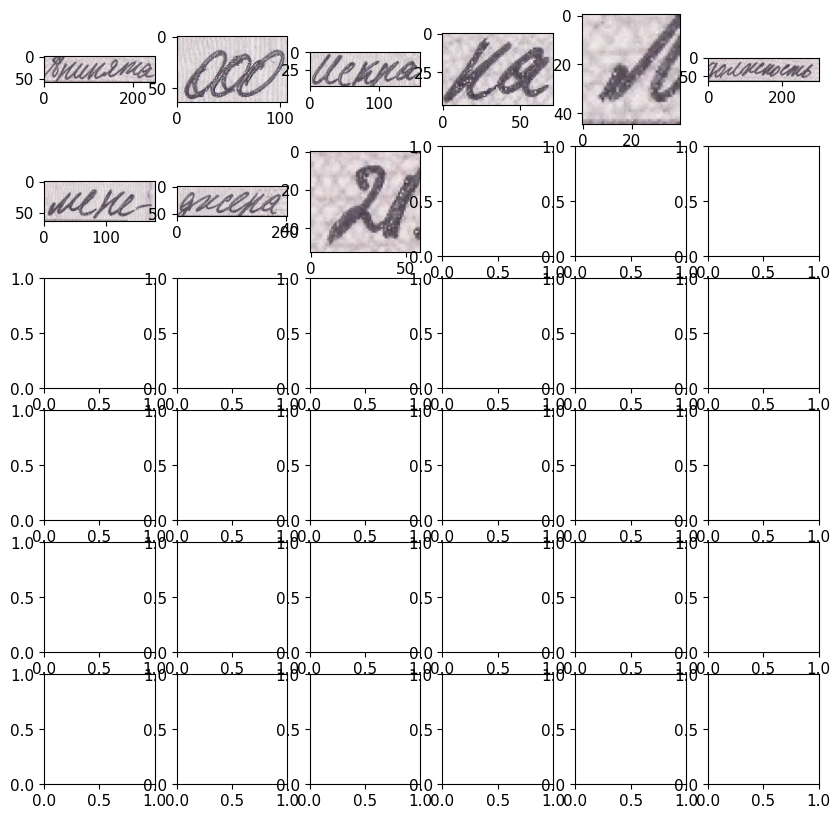

In [277]:
import matplotlib.pyplot as plt
%matplotlib inline

images = res[1]
N = 48  # how many crops to show
n = int(N ** (0.5))
k = 0
dt = res[0].split()
dt_box = []
f, axarr = plt.subplots(n,n,figsize=(10,10))
for i in range(n):
    for j in range(n):
        print(dt[k], dt[k].isdigit(), dt[k].replace('.', '').replace(')', '').isdigit())
        # if dt[k].replace('.', '').replace(')', '').isdigit():
        axarr[i, j].imshow(images[k].img)
        dt_box.append(images[k].points)
        print(images[k].points)
        # print(dt[k], dt[k].isdigit(), dt[k].replace('.', '').replace(')', '').isdigit())
        k += 1
f.show()
print(dt_box)

In [ ]:
import cv2
import pytesseract
import re

pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'


def classify_by_path(path):
    img = cv2.imread(path)
    text = pytesseract.image_to_string(img, lang='rus')
    text = text.replace('\n', '').replace(' ', '').lower()
    if 'трудоваякнижка' in text and not (('сведен' in text and 'ия' in text) or 'сведения' in text):
        return 'main_page'
    elif (('сведен' in text and 'ия' in text) or 'сведения' in text) and 'трудоваякнижка' not in text:
        return 'job_info'
    else:
        return 'bad_page'


def classify_by_img(img):
    text = pytesseract.image_to_string(img, lang='rus')
    text = text.replace('\n', '').replace(' ', '').lower()
    if 'трудоваякнижка' in text and not (('сведен' in text and 'ия' in text) or 'сведения' in text):
        return 'main_page'
    elif (('сведен' in text and 'ия' in text) or 'сведения' in text) and 'трудоваякнижка' not in text:
        return 'job_info'
    else:
        return 'bad_page'